Here we preprocess the expression matrix; many of the scanpy functions depend on each other, so the code is more readable as a pipeline.

In [1]:
import sys
sys.path.append('..')


from load import save_h5ad, load_h5ad
from temp import save_figure, plotHighestExprGenes, plotViolin, plotHistogram, plotScatter, calculate_sf, plotTSNE

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_dir = '/home/chiaretta/performance/programming/github/GeneVAE'
data_dir = base_dir + '/data'
processed_dir = data_dir + '/processed'
plots_dir = base_dir + '/plots'

from pathlib import Path
for i in [data_dir, processed_dir, plots_dir]:
    Path(i).mkdir(parents=True, exist_ok=True)

In [8]:
adata = load_h5ad('raw')
print (adata.shape)
print (adata.obs.keys().tolist())
print (adata.var.keys().tolist())

(3005, 19972)
['clusters', 'tissue', 'n_counts', 'n_genes_expressed']
['n_cells']


PLOTTING: highest_expr_genes


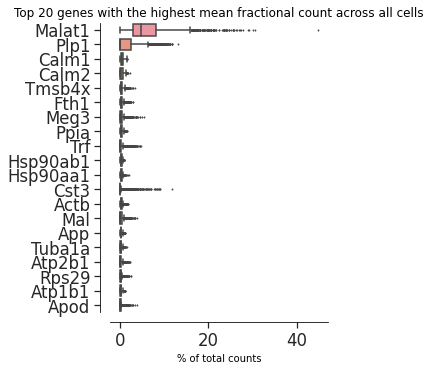

In [4]:
plotHighestExprGenes(adata, show=True)

PLOTTING: histogram


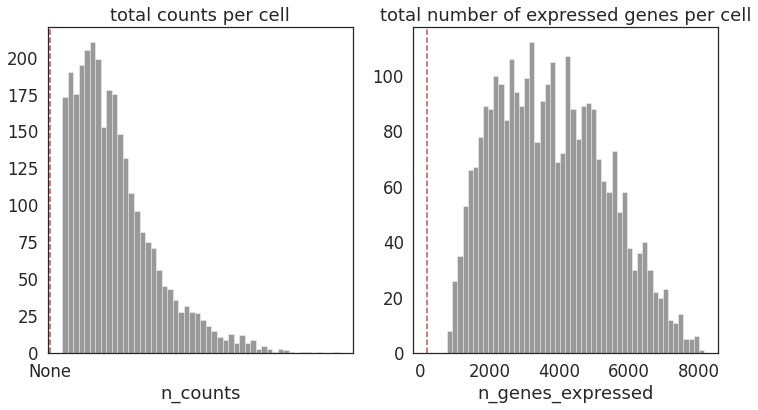

In [9]:
plotHistogram(adata, {'total counts per cell':['n_counts', 'None'], 'total number of expressed genes per cell':['n_genes_expressed', 200]},  show=True)

# to add: 'total number of cells each gene is expressed in':['n_cells', 3]

In [11]:
adata = adata[adata.obs.n_genes_expressed > 200, :]
print (adata.shape)

(3005, 19972)


/home/chiaretta/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [12]:
adata = adata[:, adata.var['n_cells'] > 2]
print (adata.shape)            

(3005, 18879)


/home/chiaretta/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


PLOTTING: violin_plot


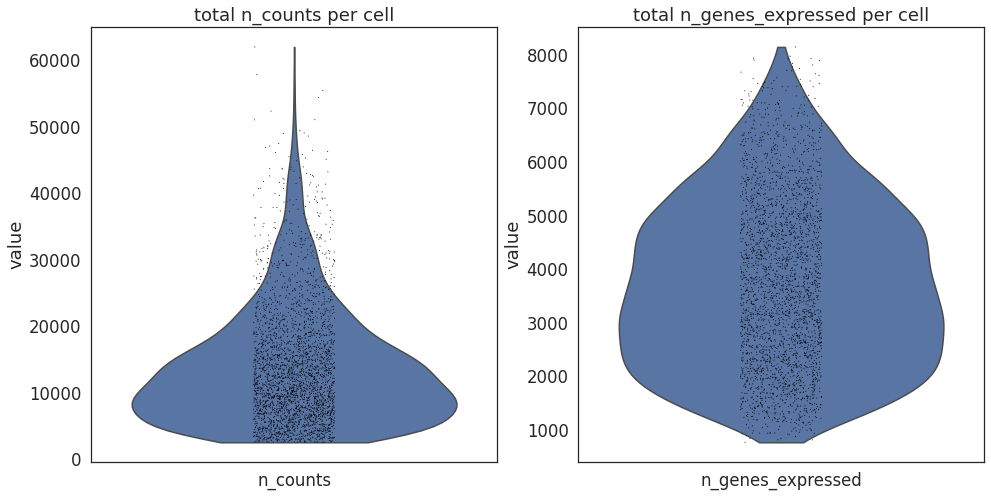

In [10]:
plotViolin(adata, {'n_counts':'n_counts', 'n_genes_expressed':'n_genes_expressed'}, show=True)